# PPM

Minimum procedure:
1. Set input sequence
2. Optionally, set alternative alphabet (default: derived from input sequence)
3. Initialise model:
    a. Simple, and optionally:
        1. Set order_bound (default: 10)
        2. Set shortest_deterministic (default: True)
        3. Set exclusion (default: True)
        4. Set update_exclusion (default: True)
        5. Set escape (default: "c", options: a, b, c, d, ax)
        6. Set alphabet_levels (or alternatively: alphabet_size)
    b. Decay (with fixed: escape = ax, exclusion = update_exclusion = False) + input time sequence, and optionally:
        1. Set order_bound (default: 10)
        2. Set ltm_weight (default: 1)
        3. Set ltm_half_life (default: 10)
        4. Set ltm_asymptote (default: 0)
        5. Set noise (default: 0)
        6. Set stm_weight (default: 1)
        7. Set stm_duration (default: 0)
        8. Set buffer_weight (default: 1)
        9. Set buffer_length_time (default: 0)
        10. Set buffer_length_items (default: 0)
        11. Set only_learn_from_buffer (default: False)
        12. Set only_predict_from_buffer (default: False)
        13. Set seed (default: random int)
        14. Set alphabet_levels (or alternatively: alphabet_size)
4. Run model
5. Interpret results


# 1. Set input sequence

In [1]:
x1 = ["a", "b", "r", "a", "c", "a", "d", "a", "b"]
x2 = [1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1]

In [2]:
input_sequence = x1

# 2. Set alphabet

In [3]:
# a) 
#alphabet_size = len(set(input_sequence))

# b) 
alphabet_levels = set(input_sequence)

# 3. Initialise model

In [4]:
from cmme.ppmdecay import *

## a) PPM-Simple

In [5]:
ppm_ib = PPMSimpleInstructionBuilder()

ppm_ib\
    .alphabet_levels(alphabet_levels)\
    .input_sequence(input_sequence)\
    .order_bound(4)

## or: b) PPM-Decay

In [6]:
input_time_sequence = list(range(0, len(input_sequence)))

In [7]:
ppm_ib = PPMDecayInstructionBuilder()

ppm_ib\
    .alphabet_levels(alphabet_levels)\
    .input_sequence(input_sequence, input_time_sequence)\
    .order_bound(4)

# 4. Run model

In [8]:
ppm_if = ppm_ib.to_instructions_file()

ppm_model = PPMModel()

ppm_rf = ppm_model.run_instructions_file(ppm_if)

Instructions file written to /var/folders/lx/_yl9nwrs681dpnp5jrv9n6s00000gn/T/tmpnltyxh73


In [9]:
print(ppm_rf.__dict__)

{'results_file_meta_path': '/var/folders/lx/_yl9nwrs681dpnp5jrv9n6s00000gn/T/resultsfile-tmpnltyxh73', 'model_type': <PPMModelType.DECAY: 'DECAY'>, 'alphabet_levels': ['d', 'r', 'a', 'c', 'b'], 'instructions_file_path': '/var/folders/lx/_yl9nwrs681dpnp5jrv9n6s00000gn/T/tmpnltyxh73', 'results_file_data_path': '/var/folders/lx/_yl9nwrs681dpnp5jrv9n6s00000gn/T/resultsfile-tmpnltyxh73-data.feather', 'results_file_data': <cmme.ppmdecay.binding.PPMDecayResultsFileData object at 0x7f7c5edcb100>}


In [10]:
print(ppm_rf.results_file_data.__dict__)

{'results_file_data_path': '/var/folders/lx/_yl9nwrs681dpnp5jrv9n6s00000gn/T/resultsfile-tmpnltyxh73-data.feather', 'df':   symbol  pos  time  model_order  information_content   entropy  \
0      a    0   0.0            0             2.321928  2.321928   
1      b    1   1.0            1             3.405747  1.711047   
2      r    2   2.0            2             3.983815  1.811084   
3      a    3   3.0            3             1.816987  1.985220   
4      c    4   4.0            4             5.496015  1.597728   
5      a    5   5.0            4             1.494269  2.096433   
6      d    6   6.0            4             6.394791  1.839468   
7      a    7   7.0            4             1.360393  2.180112   
8      b    8   8.0            4             2.159238  2.112400   

                                        distribution  trial_idx  
0                          [0.2, 0.2, 0.2, 0.2, 0.2]          1  
1  [0.09435566355632352, 0.09435566355632352, 0.6...          1  
2  [0.063

# 5. Visualize

In [11]:
ppm_rfdata_df = ppm_rf.results_file_data.df_of_last_trial()

In [12]:
import matplotlib.pyplot as plt

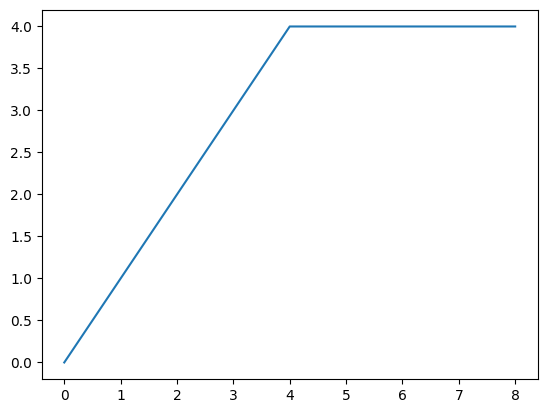

In [13]:
f = plt.figure()

plt.plot(ppm_rfdata_df["model_order"]);

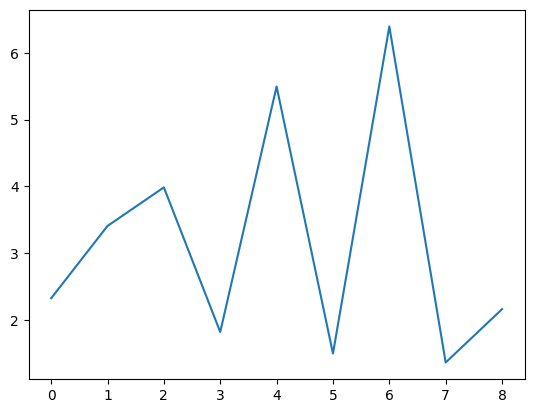

In [14]:
f = plt.figure()

plt.plot(ppm_rfdata_df["information_content"]);

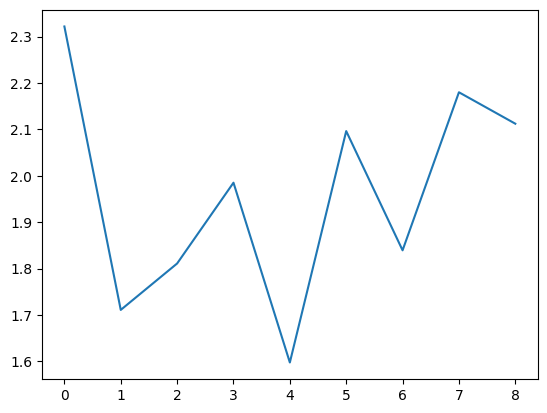

In [15]:
f = plt.figure()

plt.plot(ppm_rfdata_df["entropy"]);

In [16]:
# TODO: plot predictive distribution